In [25]:
import numpy as np
import matplotlib.pyplot as plt
from findiff import FinDiff,Coefficient,BoundaryConditions,PDE

In [39]:
# Geometry

# Radius in [m]
r_i = 0.006
r_interface = 0.008
r_o = 0.010

# Angle in [rad]
theta_0 = 0
theta_1 = np.pi/3

# Grid size
dr = 0.00004
dr2 = dr**2
r = np.arange(r_i,r_o,dr)
r = np.append(r,r_o)
n_r = len(r)
print(n_r)
ind_interface = (np.abs(r-r_interface)).argmin()

dtheta = np.pi/60
dtheta2 = dtheta**2
theta = np.arange(theta_0,theta_1,dtheta)
theta = np.append(theta,theta_1)
n_theta = len(theta)
print(n_theta)

# Time steps
t = 0
dt = 0.0000001

# Thermal properties
# k = [W/m-K]
# rho = [kg/m^3]
# c_p = [J/kg-k]

# Alumina properties
k_i = 30
rho_i = 3900
c_p_i = 500

# Graphite properties
k_o = 400
rho_o = 2250
c_p_o = 707

# Convection properties
k = 30
mdot = 150*0.00129/60
mu = 1.81e-5
c_p = 1005
d = 0.00730
h = k*d*0.023*(mdot*d/mu)**0.8*(mu*c_p/k)**0.4
T_f = 300
T_const = 575

R,Theta = np.meshgrid(r,theta,indexing='ij')
f_polar = R**2

101
21


In [57]:
laplace_polar = (FinDiff(0, dr, 2) + Coefficient(1/R) * FinDiff(0, dr) + Coefficient(1/R**2) * FinDiff(1, dtheta, 2))

bc = BoundaryConditions((n_r,n_theta))
bc[n_r-1,0:int(n_theta/2)] = T_const
bc[n_r-1,int(n_theta/2):n_theta-1] = FinDiff(0,dr,1), 0
bc[:,0] = FinDiff(1,dtheta,1), 0
bc[:,n_theta-1] = FinDiff(1,dtheta,1), 0
bc[0,:] = 300

pde = PDE(laplace_polar,f_polar,bc)
u = pde.solve()

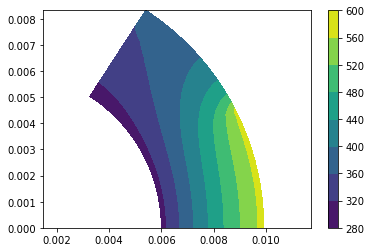

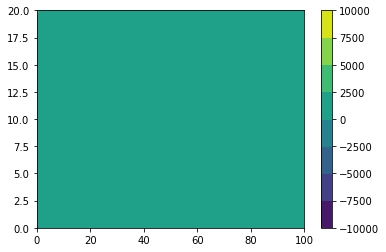

In [58]:
fig,ax = plt.subplots()
x = np.zeros((n_r-2,n_theta-1))
y = np.zeros((n_r-2,n_theta-1))
for i in range(n_r-2):
    for j in range(n_theta-1):
        x[i,j] = r[i]*np.cos(theta[j])
        y[i,j] = r[i]*np.sin(theta[j])
ax.axis('equal')
cf = plt.contourf(x,y,u[1:n_r-1,0:n_theta-1])
cbar = plt.colorbar(cf)

fig = plt.subplots()
x = np.arange(0,n_r)
y = np.arange(0,n_theta)
X,Y = np.meshgrid(x,y)
cf = plt.contourf(X,Y,np.transpose(u))
plt.colorbar()